### Objective and Context

Aegis Bank Inc. is a global financial institution with an extensive customer base spanning across the globe. Committed to providing excellent financial services, the bank places a strong emphasis on risk management and customer satisfaction. Recognizing the importance of ensuring the financial stability of its clients, Aegis Bank invests significant resources in predictive analytics to proactively identify potential risks.

As a recently onboarded Data Scientist in the Risk Management Department, my primary responsibility is to leverage data-driven insights to predict whether customers are at risk of defaulting on their loans. Aegis Bank aims to optimize its risk mitigation strategies by identifying patterns and characteristics associated with customers who might face challenges in meeting their financial obligations.

By employing advanced machine learning models and predictive analytics, I will analyze historical customer data to identify key features and trends that correlate with loan defaults. The goal is to develop a robust predictive model that can accurately forecast the likelihood of a customer defaulting on a loan. This proactive approach will empower Aegis Bank to tailor its risk management strategies, allowing for targeted interventions and support to customers who may be at risk.

Ultimately, the insights derived from this predictive modeling initiative will enable Aegis Bank to optimize resource allocation, enhance customer engagement, and maintain a robust risk management framework that aligns with the bank's commitment to delivering exceptional financial services globally.

##Objective:



*   To identify the different factors which leads to Defaultation of Loan repayments
*   To make a model to predict wheather a customer will default on his/her loan or not

##Dataset:

The data contains customer loan type, their income and loan default status.



*   **ID** - Customer identifier (Unique in nature)
*   **Year** - Year in which the loan is taken
*   **Loan_Limit** - Two types of loan limits - CF and NCF
                 CF - Conforming loan (Limit < 500,000)
                 NCF - Non-conforming loan (No Limit, i.e. Limit > 500,000)
*   **Gender** - Customer's Gender
*   **Approve_in_adv** - Is customer pre-approved for the loan or not.
*   **Loan_type **- Type of loan (Type 1, Type 2 or Type 3)
* **Loan_Purpose**- Purpose of loan (i.e. Loan taken for exactly what purpose - P1, P2, P3, P4)

* Credit_worthiness - Credit worthiness type (L1 or L2)

* **open_credit** - Open credit ype or not
* **business_or_commercial** - Is the loan for business/commercial or not
* **loan_amount** - Total loan amount taken from the bank
* **Interest_rate_spread** - Interest rate charged by the banks to private sector customers minus the rate paid by commercial banks for demand, time, savings.
* **Upfront_charges** - Upfront charges paid by customers
* **term** - period for which the loan is taken
* **Neg_ammortization** - The loan amount will go up even after paying because the amount owed by customer is not enough to cover the interest.
* **interest_only** - Only interest paid by customer or not
* **lump_sum_payment** - Did customer paid the lump sum amount or not
* **property_value** - Current Total value of the property for which the loan is taken
* **Construction_type** - Is the construction_type mh or sb (i.e. manufactured house or a small business)
* **occupancy_type** - What is the occupancy type? (Primary residence, Secondary residence, or investment residence)
* **Secured_by** - Loan secured by a home or a land.
* **Total_unit** - Total aailable units of the home.
* **Income** - Income of the customer
* **Credity_type** - Credit type of customer (Experian, Equifax, CIB, CRIF)
* **Credit_score** - Credit score of the customer
* **co_applicant_credit_type** - Co-applicant credit card type
* **Age** - Age of the customer
* submission_of_application - Application submitted directly to the institution or nor.
* **LTV** - Loan-to-Value Ratio used for assessment of lending financial risk that financial institutions examine before approving.

* **Region** - Region of the bank
* **Security_type** - Wheather the security type is direct or indirect
* **Status** - Loan default status (i.e. 0 - Not defaulted, 1 - Defaulted on loan)
dtir - Debt-to-income ratio assessed by banks before lending the money





###Importing the necessary Libraries and Data Overview -

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Default.csv to Loan_Default (1).csv


In [ ]:
#reading the dataset
loan_raw = pd.read_csv('Loan_Default.csv')
loan_raw.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Printing general information about the dataset**

In [ ]:
loan_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
loan = loan_raw.copy()

**Finding unique values in the dataset attributes-**

In [ ]:
loan_raw.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

##Exploratory Data Analysis

###Finding the percentage of null values in each column

In [ ]:
def missing_check(lo):
    total = lo.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = ((lo.isnull().sum()/lo.isnull().count())*100).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(loan_raw)

,Total,Percent
Upfront_charges,39642,26.664425
Interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
LTV,15098,10.155378
property_value,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
submission_of_application,200,0.134526


###Observations -

- The columns such as 'ID', 'year' can be dropped as it won't be adding any value to our models.
- The column 'co-applicant_credit_type', 'Interest_rate_spread' and 'submission_of_application' can also be dropped as they are not adding any valuable information to the dataset.

**Dropping the unnecessary columns**

In [ ]:
#Dropping the columns
loan_raw = loan_raw.drop(['ID', 'year', 'co-applicant_credit_type', 'Interest_rate_spread', 'submission_of_application'], axis=1)

###Univariate Analysis for categorical variables

In [ ]:
#creating a list of categorical columns
cat_cols = ['Status', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only',
            'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'age', 'Region', 'Security_Type' ]

In [ ]:
#Checking the percentage of subcategories for each of the categorical column

for i in cat_cols:
  print(loan_new[i].value_counts(normalize=True))
  print('--'*30)

0    0.846511
1    0.153489
Name: Status, dtype: float64
------------------------------------------------------------
cf     0.933712
ncf    0.066288
Name: loan_limit, dtype: float64
------------------------------------------------------------
Joint                0.284634
Male                 0.283064
Sex Not Available    0.248643
Female               0.183660
Name: Gender, dtype: float64
------------------------------------------------------------
nopre    0.83816
pre      0.16184
Name: approv_in_adv, dtype: float64
------------------------------------------------------------
type1    0.773318
type2    0.133020
type3    0.093662
Name: loan_type, dtype: float64
------------------------------------------------------------
p3    0.385358
p4    0.366726
p1    0.225862
p2    0.022054
Name: loan_purpose, dtype: float64
------------------------------------------------------------
l1    0.957907
l2    0.042093
Name: Credit_Worthiness, dtype: float64
------------------------------------------

###Observations

- The customer loan defaultation rate is 15%
- Around 93% of the people have a conforming loan limit.
- Only 16% of the people are pre-approved for taking the loans.
- 73% people have taken type 1 loan
- Only 13% customers have taken loan for the businesses/commercial use.
- 99% people have secured their loan by keeping their homes as mortgage.
- 50% people are located in North region and 42% in the south region. Very less people are from Central and North-east. This means the bank has just opened in the Central and Northeast region or it has less number of offices in this region.
- Most of the customers are of 45 - 54 years of age.


###Bivariate and Multivariate Analysis

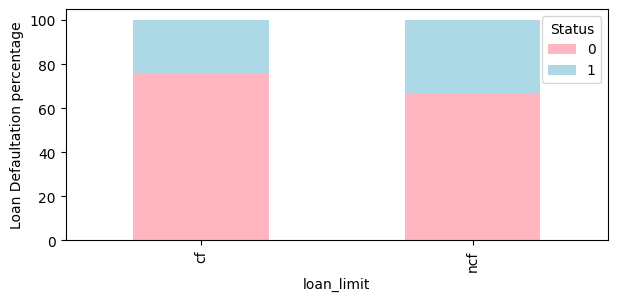

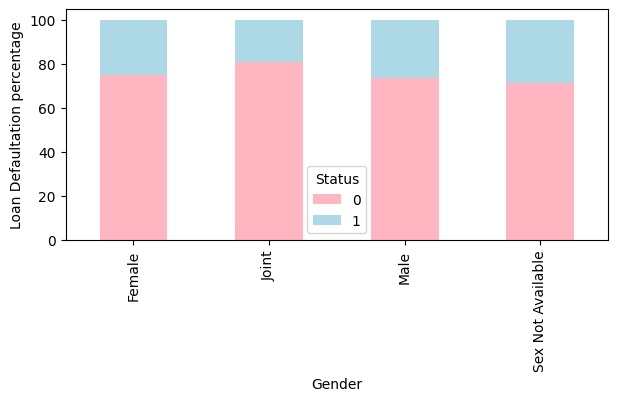

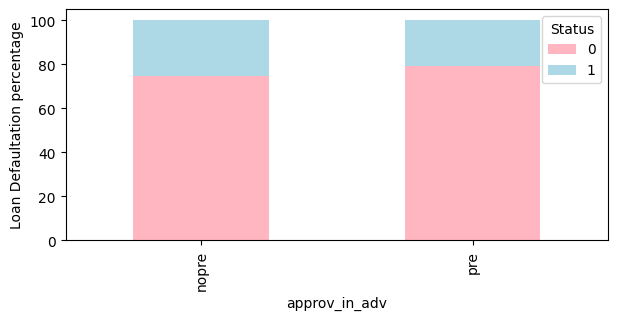

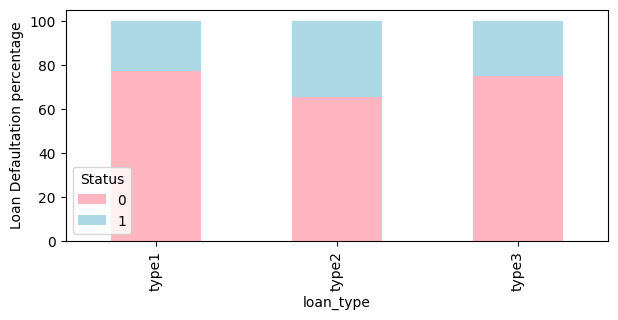

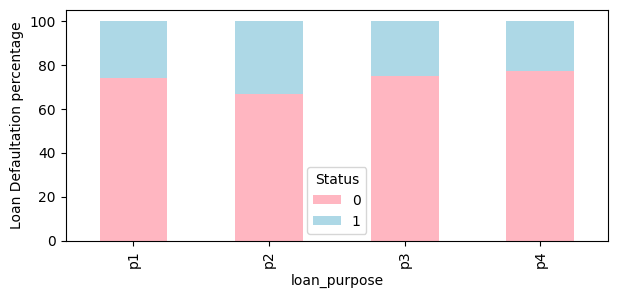

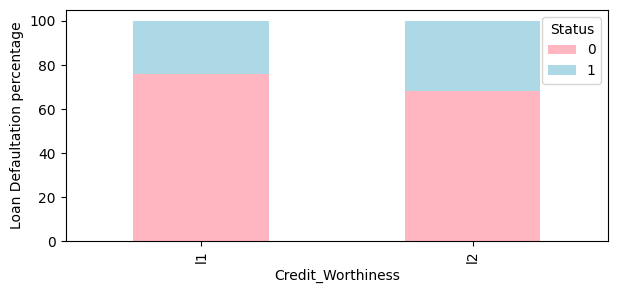

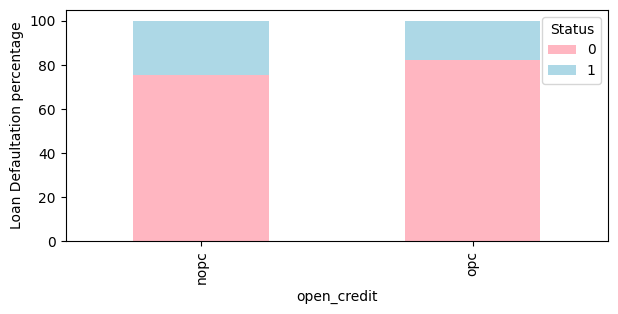

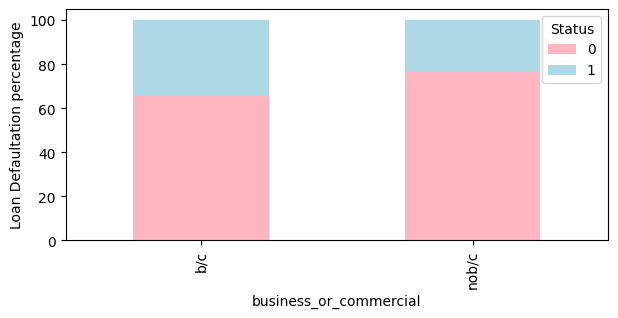

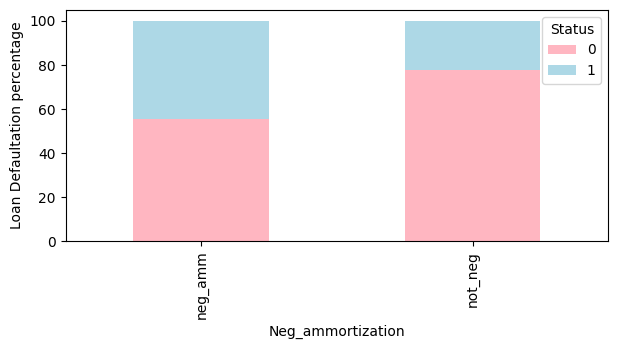

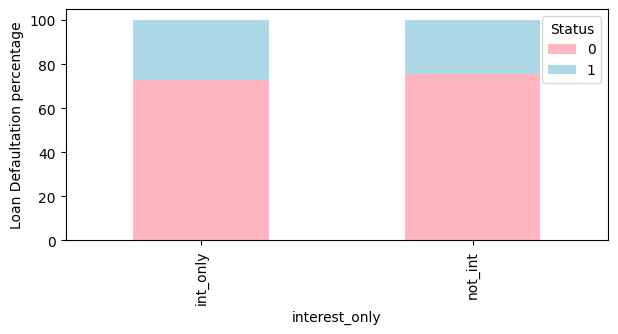

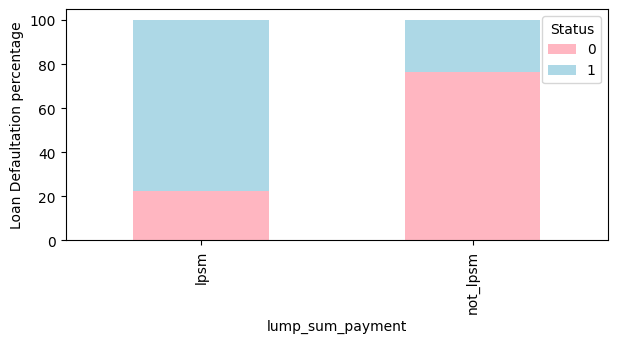

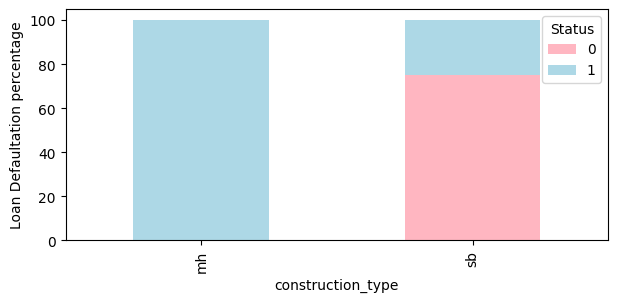

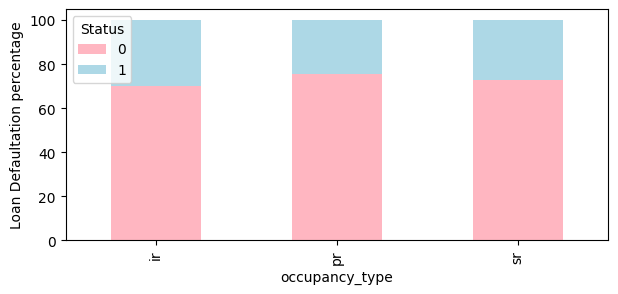

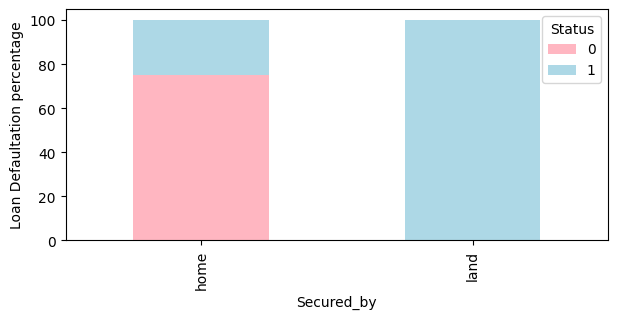

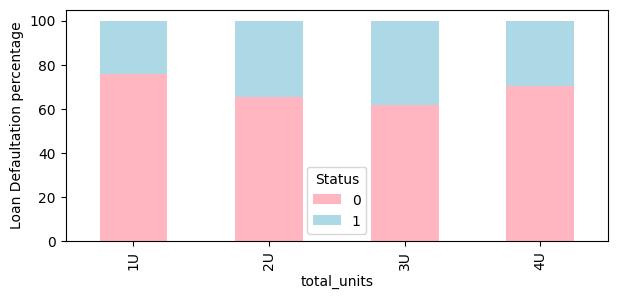

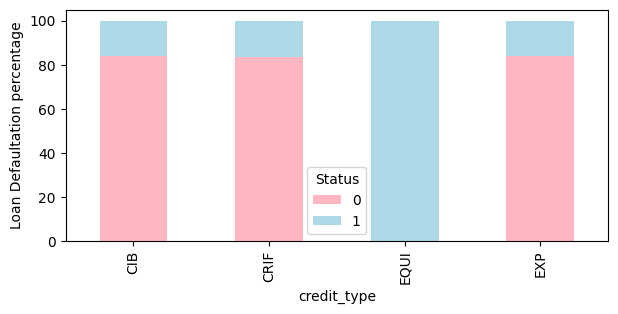

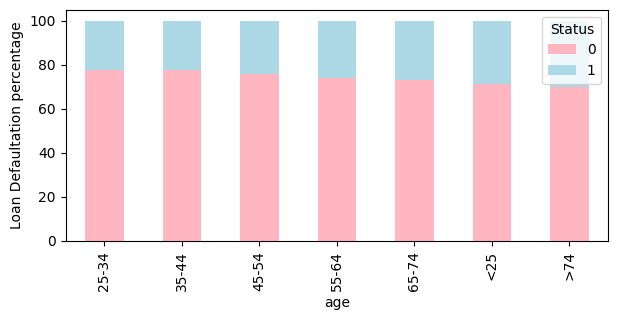

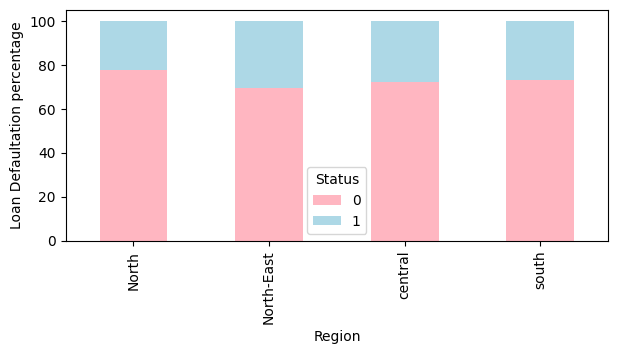

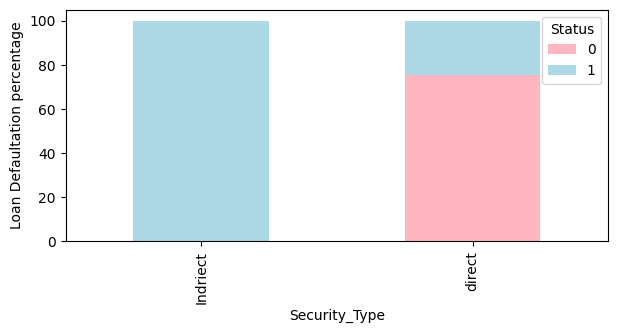

In [ ]:
for i in cat_cols:
  if i!= 'Status':
    (pd.crosstab(loan[i],loan['Status'], normalize='index')*100).plot(kind='bar', figsize=(7,3), stacked=True, color=[ '#FFB6C1', '#ADD8E6' ], width =0.5)
    plt.ylabel('Loan Defaultation percentage')

###Observations -

- Customers with Non-conforming loan limit have 15% higher chance of defaulting on their loan, which is high compared to 20% chance of loan defaultation for the conforming limit customers.
- No pre-approved customers have a 10% chance of defaultation than the people who are pre-approved.
- Customers who take type 2 loan have highest percentage of loan defaultation than the customers who take type 1 and 3 loan.
- Customers who have negative ammortization default almost 30% high chance of defaultation than the customers who do now come under negative ammortization category.
- Customers who pay the lumpsum amount default almost 60% more than the customers who do not pay the lumpsum amount. This states that it is better to take monthly payments from customers rather than waiting for the lumpsum amount of repayments.
- It can be seen that the people who secure their loan by land, all of them have defaulted on their loans. This indicates that either customers with land default or we don't have enough data for customers who secure their loan by land.
- The other remaining variables do not give us much information on the defaultation rate and it seems we do not have much data regarding these attributes.

#Data Preparation

Since our dataset contains many number of missing values in more than 7 columns, we will drop the rows which have more than 3 missing values from the dataset as the rows with missing values will add a bias to our model.

In [ ]:
#deleting the rows in the missing_values dataframe which have more than 3 missing values
for miss_count in range(loan_raw.shape[0]):
  loan_raw.loc[miss_count, 'Missing_values_count'] = loan_raw.iloc[miss_count, :].isnull().sum()

In [ ]:
max_miss_count_in_rows = 3

print('Total rows before removing missing values : {}'. format(loan_raw.shape[0]))
loan_raw.drop(loan_raw[loan_raw['Missing_values_count'] > max_miss_count_in_rows].index, axis =0, inplace=True)
print('Total rows after removing missing values : {}'. format(loan_raw.shape[0]))

Total rows before removing missing values : 148670
Total rows after removing missing values : 131217


In [ ]:
def missing_check(lo):
    total = lo.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = ((lo.isnull().sum()/lo.isnull().count())*100).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(loan_raw)

,Total,Percent
Upfront_charges,22435,17.097632
rate_of_interest,19647,14.972907
income,7452,5.679142
dtir1,7352,5.602933
loan_limit,2389,1.820648
approv_in_adv,638,0.486217
loan_purpose,99,0.075448
Neg_ammortization,88,0.067064
term,26,0.019815
Status,0,0.000000


**Observations -**

- The number of missing values percentage have reduced drastically. Still we have to address the remaining missing values.
- As further we cannot remove the rows or columns with missing values, we will use advanced data imputation methond called KNN imputer to fill our missing values with most relevant data.

In [ ]:
#creating a list of numerical columns
num_cols = ['loan_amount', 'Upfront_charges', 'rate_of_interest', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

In [ ]:
#imputing the missing data

loan_imp = loan_raw[num_cols]

from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=3)
knn.fit(loan_imp)
X = knn.transform(loan_imp)
loan_imp = pd.DataFrame(X, columns= num_cols)

In [ ]:
for column in loan_imp.columns:
    loan_raw[column].fillna(loan_imp[column], inplace=True)

# Checking if there are any missing values remaining in the original dataset
remaining_missing = loan_raw.isnull().sum().sum()
print(f"Remaining missing values in the original dataset: {remaining_missing}")

Remaining missing values in the original dataset: 9854


###Observations -

- The number of missing values have been reduced drastically.
- We still have 9854 missing values in our dataset, we cannot move forward without removing or imputing them.

For this, we will use now simple imputer for filling the missing values


In [ ]:
from sklearn.impute import SimpleImputer

imputer_simple = SimpleImputer(strategy='mean')
loan_raw[num_cols] = imputer_simple.fit_transform(loan_raw[num_cols])

In [ ]:
for column in loan_imp.columns:
    loan_raw[column].fillna(loan_imp[column], inplace=True)

# Check if there are any missing values remaining in the original dataset
remaining_missing = loan_raw.isnull().sum().sum()
print(f"Remaining missing values in the original dataset: {remaining_missing}")

Remaining missing values in the original dataset: 3214


In [ ]:
def missing_check(lo):
    total = lo.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = ((lo.isnull().sum()/lo.isnull().count())*100).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(loan_raw)

,Total,Percent
loan_limit,2389,1.820648
approv_in_adv,638,0.486217
loan_purpose,99,0.075448
Neg_ammortization,88,0.067064
occupancy_type,0,0.000000
dtir1,0,0.000000
Status,0,0.000000
Security_Type,0,0.000000
Region,0,0.000000
LTV,0,0.000000


###Observations -

- Now, there are only few missing values as compared to our previous ones
-Since we have enough data for building our model, we will remove the rows with missing data as they won't be adding any value

In [ ]:
# Drop rows with any missing values
loan_new = loan_raw.dropna()

In [ ]:
remaining_missing = loan_new.isnull().sum().sum()
print(f"Remaining missing values in the original dataset: {remaining_missing}")

Remaining missing values in the original dataset: 0


In [ ]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128003 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              128003 non-null  object 
 1   Gender                  128003 non-null  object 
 2   approv_in_adv           128003 non-null  object 
 3   loan_type               128003 non-null  object 
 4   loan_purpose            128003 non-null  object 
 5   Credit_Worthiness       128003 non-null  object 
 6   open_credit             128003 non-null  object 
 7   business_or_commercial  128003 non-null  object 
 8   loan_amount             128003 non-null  float64
 9   rate_of_interest        128003 non-null  float64
 10  Upfront_charges         128003 non-null  float64
 11  term                    128003 non-null  float64
 12  Neg_ammortization       128003 non-null  object 
 13  interest_only           128003 non-null  object 
 14  lump_sum_payment    

In [ ]:
loan_new[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,128003.0,331995.183707,182234.418680,16500.000000,196500.000000,296500.00000,436500.000000,3576500.00
Upfront_charges,128003.0,3201.872622,3194.680898,0.000000,644.120000,2650.00000,4706.865000,60000.00
rate_of_interest,128003.0,4.037493,0.555436,0.000000,3.625000,3.99000,4.375000,8.00
term,128003.0,335.012242,58.650224,96.000000,360.000000,360.00000,360.000000,360.00
property_value,128003.0,500770.950681,362317.520057,8000.000000,278000.000000,418000.00000,628000.000000,16508000.00
income,128003.0,7016.053161,6493.820908,0.000000,3840.000000,5820.00000,8520.000000,578580.00
Credit_Score,128003.0,699.631743,115.873429,500.000000,599.000000,699.00000,800.000000,900.00
LTV,128003.0,72.496370,39.819286,0.967478,60.258359,75.07716,85.925197,7831.25
dtir1,128003.0,37.719363,10.508795,5.000000,31.000000,39.00000,45.000000,61.00


###Observations -

- Average loan amount taken by the customers is USD 332000
- The average upfront charges paid by the customers is USD 3200, It ranges from 0 to as high as USD 60000.
- The average rate of interest is 4% which is common.
- The average property value is USD 500000 which indicates that the property on which the loan is given to customers tends to increase in value.
- The average monthly income of the customers is USD 7000
- The average credit score is 700 which is a good score for taking a loan
- The average LTV is 72% which states that bank usually gives out loan to customers having low LTV.
- DTIR - The debt to income ratio is 37% which indicates that the loan is ge=iven. to customers who has low DTIR. It should be less than 40% to avoid customer loan defaultation.

We will explore the numerical vairables in more depth by observing the distribution

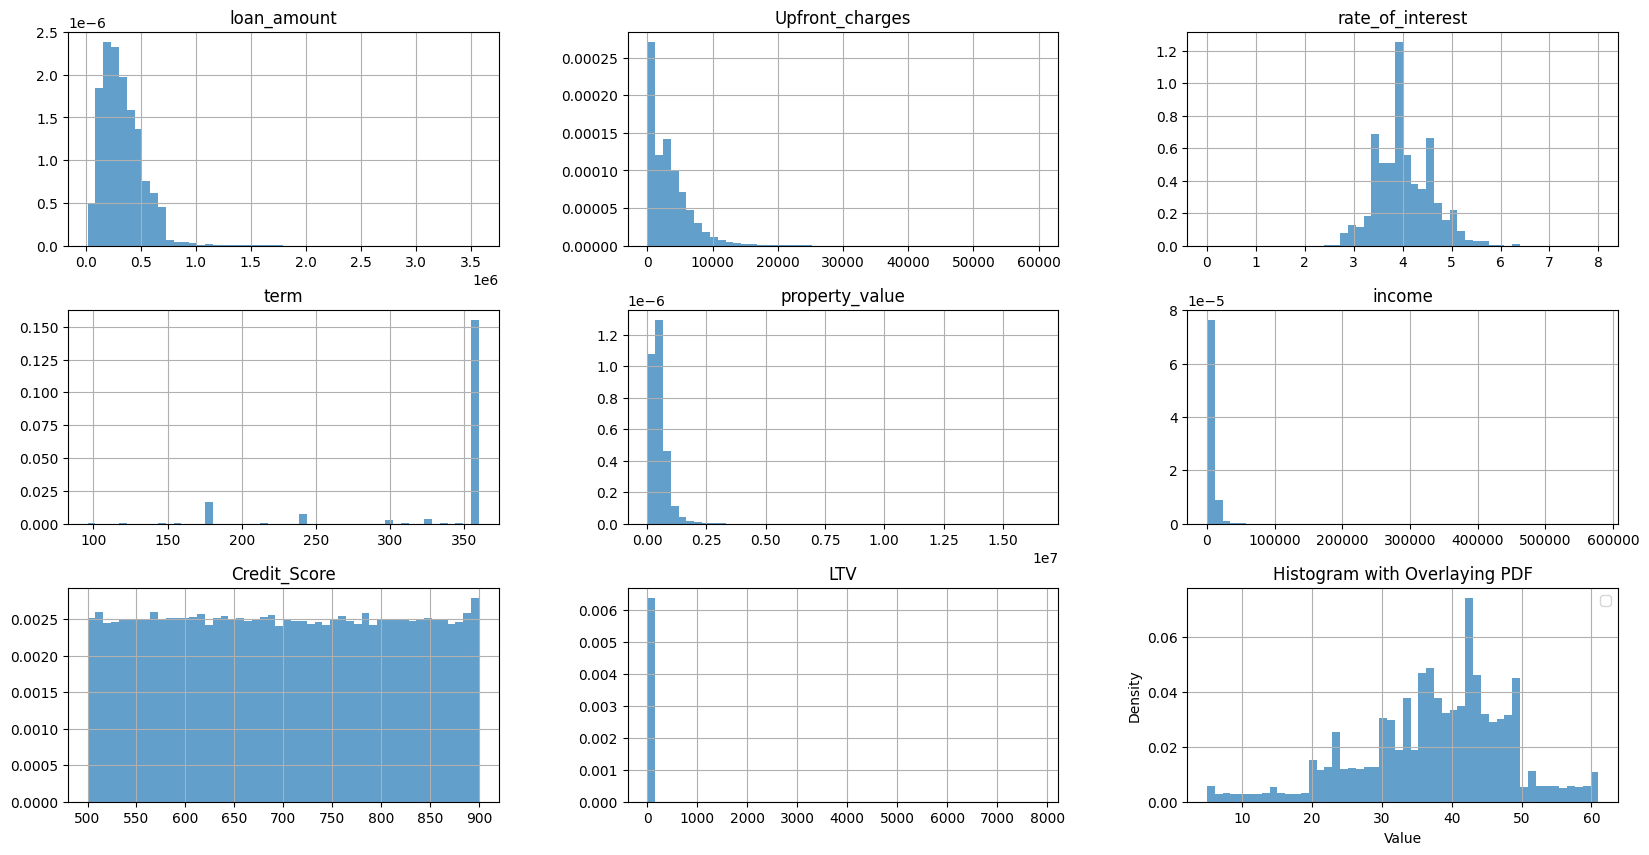

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot histograms
loan_new[num_cols].hist(bins=50, density=True, alpha=0.7, ax=ax)

# Plot probability density function (PDF) curves
for col in num_cols:
    sns.kdeplot(loan_new[col], ax=ax, label=col)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Overlaying PDF')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Observations -

- The loan amount has a right skewed distribution, indicating that the majority of the loan amount taken is between USD 200K to USD 400K.
- The majority of people do not tend to pay the upfront charges and the people who do they at pay around USD 3000.
- The rate of interest is slightly close to normal distribution with majority of interest rates between 3.5% to 4.5%
- Most people have taken a loan for a period of 350 months.
- The income of the mojarity of the people is around USD7500
- The distributions of Credit score, LTV, are not uniform and do not provide much information.

In [ ]:
#Average of Numerical columns grouped by Status of Customers who will default on their loan
loan_new.groupby(['Status'])[num_cols].mean()

,loan_amount,Upfront_charges,rate_of_interest,term,property_value,income,Credit_Score,LTV,dtir1
Status,,,,,,,,,
0,335431.669681,3229.006199,4.041519,335.034369,507079.884824,7192.422688,699.481026,71.975573,37.373570
1,313042.474678,3052.227086,4.015290,334.890212,465976.281366,6043.350130,700.462971,75.368642,39.626457


In [ ]:
#dropping the categorical columns which do not add any value to the models
loan_new = loan_new.drop(['Missing_values_count', 'open_credit', 'interest_only', 'Secured_by', 'total_units', 'Security_Type'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

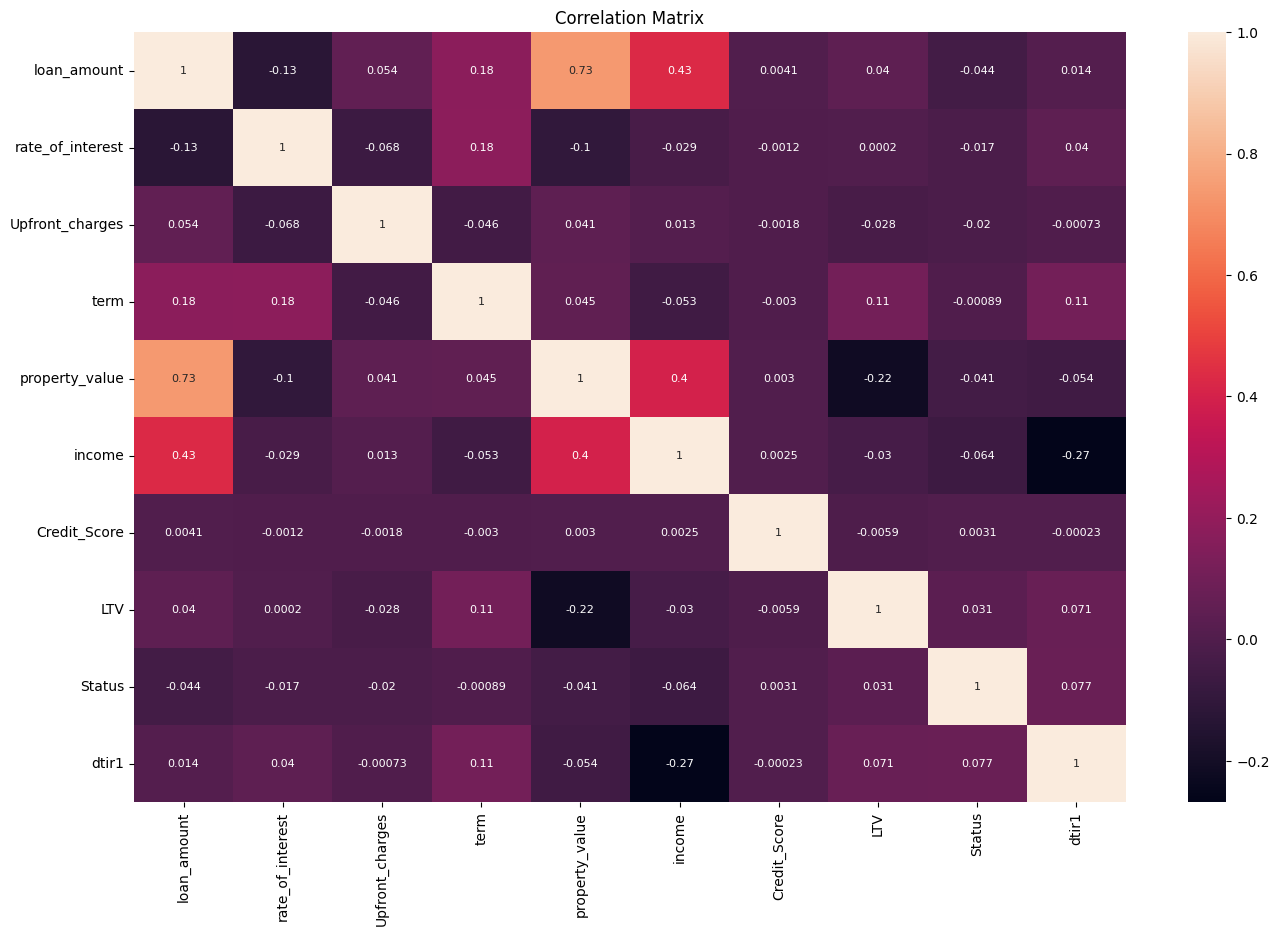

In [ ]:
#Correlation Matrix
corr_matrix = loan_new.corr()
corr_matrix

#Correlation matrix in the form of heat map
plt.subplots(figsize=(16,10))
plt.xticks(rotation=0)
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix,annot = True, annot_kws = {'size': 8})
plt.show

###Observations -

- The peoperty value and the loan amount is highly corelated with each other which is obvious as the loan amount will increase for a property of high value.
- The income and the loan amount are correlated with each other because if we have high income, we are eligible for high amount of loans

Creating Dummy columns for Columns of Categorical values

In [ ]:
#creating list of dummy variables
get_dummies_for = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization', 'lump_sum_payment', 'construction_type',
                   'occupancy_type', 'credit_type', 'Region']

loan_new = pd.get_dummies(data = loan_new, columns=get_dummies_for, drop_first=True)

#mapping Age column

dict_Age = {'<25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, '>74': 7}

loan_new['age'] = loan_new.age.map(dict_Age)



#Data Partitioning and Scaling

**Model Building Approach -**

- Preparing the data for modelling
- Partitioning the data into train and test set
- Build the model on the training data
- Tuning of the model if required
- Testing the data on the test set.


Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
Y = loan_new.Status
X = loan_new.drop(columns=['Status'])

###Scaling the Data-

###Why to scale the data ?

-
In this dataset, the independent variables exhibit varying scales. The presence of disparate scales among features introduces the risk of assigning greater importance to those with higher magnitudes, potentially overshadowing features with smaller magnitude changes that might still be equally or even more significant in terms of percentage changes. Such a scenario can lead to a skewed influence of certain features in our machine learning algorithm, and it is undesirable for the model to exhibit bias toward any specific feature.


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

###Splitting the data into 70% train and 30% test set

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

Creating a function to calculate and print the classification report and the confusion matrix

In [ ]:
def cnf_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Will Not Default', 'Will Default'], yticklabels=['Will Not Default', 'Will Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#Model Building

###Building Logistic Regression Model

In [ ]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

Reading the confusion matrix (clockwise):

True Negative (Actual=0, Predicted=0): Model predicts that an customer would not default and the customer does not default on their loan

False Positive (Actual=0, Predicted=1): Model predicts that an customer would default but the customer does not default on their loan

False Negative (Actual=1, Predicted=0): Model predicts that an customer would not default but the customer defaultes on their loan

True Positive (Actual=1, Predicted=1): Model predicts that an customer would default and the employee actually defaults on their loan

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     75849
           1       0.72      0.11      0.20     13753

    accuracy                           0.86     89602
   macro avg       0.79      0.55      0.56     89602
weighted avg       0.84      0.86      0.81     89602



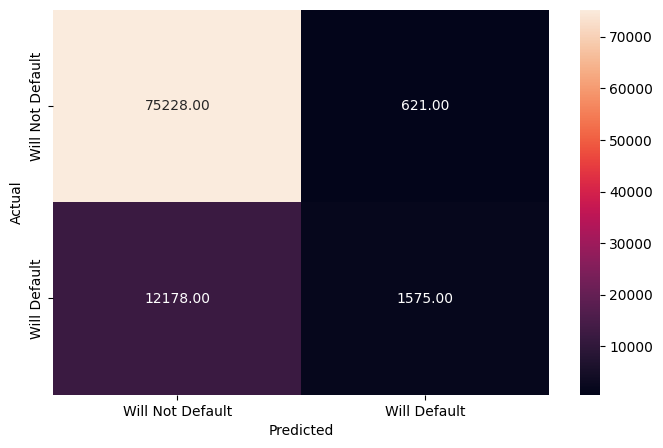

In [ ]:
#checking the performance on the training data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_train = lg_model.predict(X_train)
cnf_metrics(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32507
           1       0.71      0.11      0.19      5894

    accuracy                           0.86     38401
   macro avg       0.79      0.55      0.56     38401
weighted avg       0.84      0.86      0.81     38401



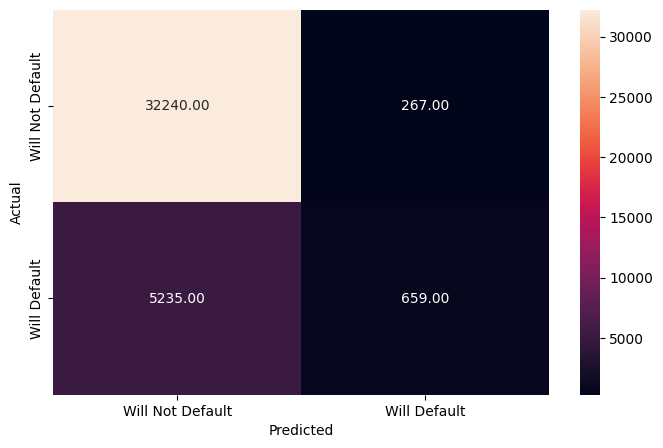

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg_model.predict(X_test)
cnf_metrics(y_test, y_pred_test)

###Observations -

- We got an accuracy of 86% on both our train and test datasets
- The recall for class 0 is good but the recall for class 1 is too low, only 11% on both of our datasets.
- To conclude, this model failed to identify the majority of employees who will default on their loan.

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg_model.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
LTV,0.633367
loan_limit_ncf,0.210849
loan_purpose_p3,0.198896
property_value,0.150220
age,0.140626
loan_purpose_p2,0.137097
dtir1,0.122091
Credit_Worthiness_l2,0.100080
Region_central,0.083472
Gender_Sex Not Available,0.081095


###Observations -

Factors which afftect the loan defaultation are -
- High LTV
- Loan_limit_ncf
- Loan_purpose_p3
- Property_value
- Age
- Loan_purpose_p2
- DTIR
- Credit_worthiness

Factors which negatively affect the loan defaultation -

- Neg_ammortization_not_neg
- lump_sum_payment_not_lpsm
- income
- Rate_of_interest
- loan_type_p3
- occupancy_type_pr
- Upfront_charges
- Loan_amount


- Based on the above Logistic Model, Hight LTV, Loan_limit_ncf is the most important feature in detecting wheather an customer will default on his loan or not. The loan_purpose_p3 also have a high importance in deciding the defaultation. The model does not give any information about the defaultation by the customers who pay the lumpsum amount of the loan repayment.
- The customers who have higher value of the property seems to default on the loan the most than the people who do not have that much. This suggests that the bank have to assess the LTV and the DTIR more strictly because the higher the DTIR is, it is more likely that the customer will default on his loan.
-  The customers with less amount of the upfront charges tends to not default on their loan repayment.
- The customers who do not have negative ammortization are also less likely t default on the loans.

###Finding the odds of the logistic regression model

In [ ]:
#finding the odds
odds = np.exp(lg_model.coef_[0])

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
LTV,1.883943
loan_limit_ncf,1.234726
loan_purpose_p3,1.220055
property_value,1.162090
age,1.150994
loan_purpose_p2,1.146939
dtir1,1.129857
Credit_Worthiness_l2,1.105260
Region_central,1.087054
Gender_Sex Not Available,1.084474


###Observations -

- The odds of the customer who has a high LTV are 1.8 times the odds of the customer who is not, because the higher the LTV is , it is not possible for the customer to stay frequent on their loan repayments.
- The odds of the customers with a non-conforming loan limit and who default on the loan are 1.2 times  than the odds of an customer who does not.

###Precision-Recall Curve for the logistic Regression

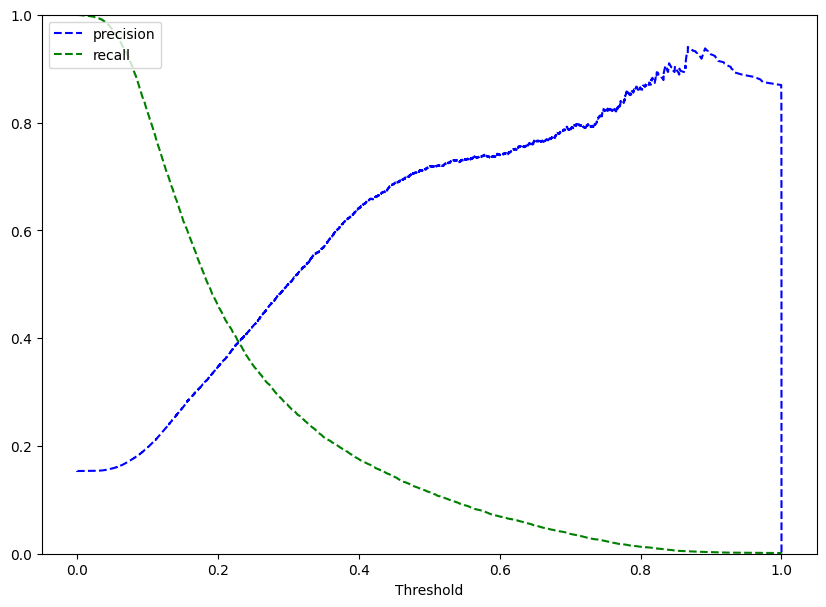

In [ ]:
#predict_proba gives the probability of each observation belonging to each class
from sklearn.metrics import precision_recall_curve

y_scores_lg_model=lg_model.predict_proba(X_train)


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg_model[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

###Observation

- We can see the precision and the recall are balanced for a threshold of about ~ 0.25

The graph shows that the precision is higher than the recall for all thresholds. This means that the model is more likely to retrieve relevant items than it is to miss relevant items.

One possible conclusion from this image is that the model is well-suited for tasks where it is important to avoid false positives. For example, if we used the model to detect defaultation, it is important to avoid falsely flagging legitimate customers as loan defaulters. In this case, a high precision score is more important than a high recall score.

Another possible conclusion is that the model can be improved by increasing its recall score. This could be done by changing the threshold or by using a different machine learning algorithm. If the recall score is increased, the machine will be able to retrieve more relevant items, but it will also be more likely to retrieve irrelevant items.

Overall, the graph shows that the model is performing well, but there is still room for improvement.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     75849
           1       0.42      0.35      0.38     13753

    accuracy                           0.83     89602
   macro avg       0.65      0.63      0.64     89602
weighted avg       0.81      0.83      0.82     89602



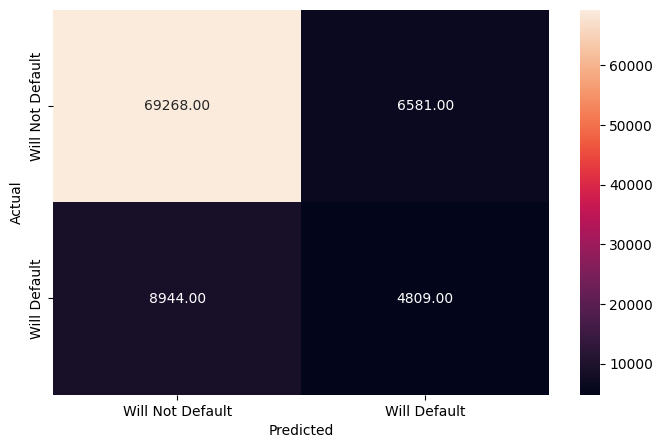

In [ ]:
optimal_threshold=.25
y_pred_train = lg_model.predict_proba(X_train)
cnf_metrics(y_train, y_pred_train[:,1]>optimal_threshold)

Model performance has improved for class 1

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     32507
           1       0.41      0.34      0.37      5894

    accuracy                           0.82     38401
   macro avg       0.65      0.63      0.63     38401
weighted avg       0.81      0.82      0.82     38401



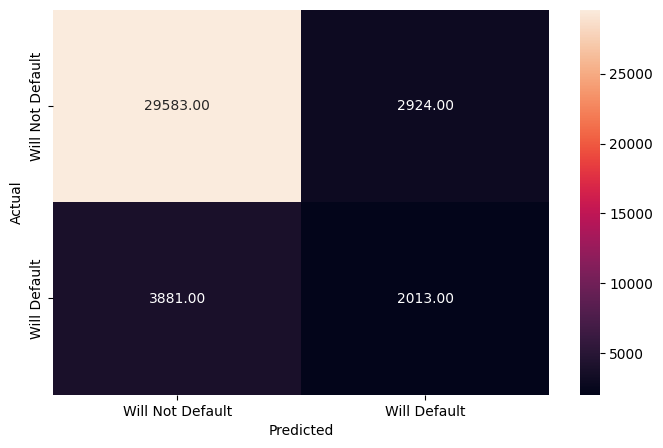

In [ ]:
optimal_threshold=.25
y_pred_test = lg_model.predict_proba(X_test)
cnf_metrics(y_test, y_pred_test[:,1]>optimal_threshold)

###Observations -

- The model performance is improved for class 1 on both train and test data.
- The average recall and precision for the model are good, but we can still see if we get better results by using other models.

###Random Forest Classifier

**Now, we will use the Random Forest Classifier to build our model and compare it with our previous ones**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     32507
           1       0.87      0.43      0.57      5894

    accuracy                           0.90     38401
   macro avg       0.89      0.71      0.76     38401
weighted avg       0.90      0.90      0.89     38401



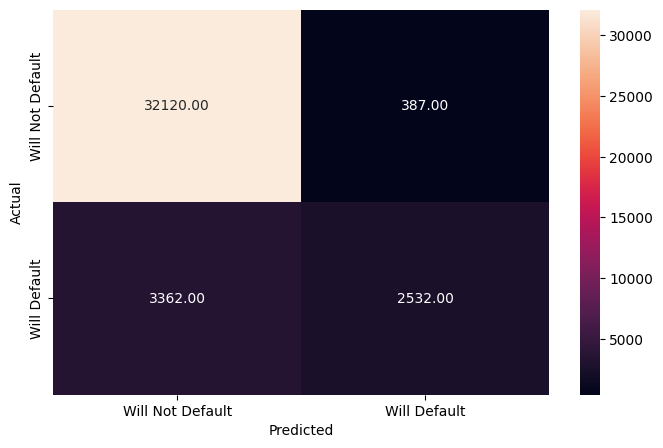

In [ ]:
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
cnf_metrics(y_test, y_pred)

###Observations -

- The recall values are not that good from the previous model.

- We have low recall for class 1, so we will have to optimize our model.

- For this, we will tune the Hyperparameters like 'n_estimators', increase the maximum depth of trees and the change the minimum number of samples required to split an internal node.

In [ ]:
rf_model = RandomForestClassifier(random_state=1, class_weight='balanced', n_estimators=100, max_depth=10, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     32507
           1       0.48      0.66      0.56      5894

    accuracy                           0.84     38401
   macro avg       0.71      0.77      0.73     38401
weighted avg       0.86      0.84      0.85     38401



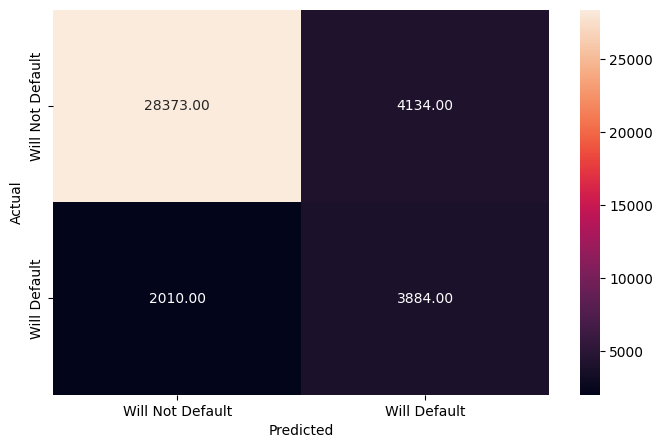

In [ ]:
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
cnf_metrics(y_test, y_pred)

###Observations -

- The model performance has significantly improves after tuning the hyperparameters.

- The recall for class 1 has increased significantly and recall of 66% indicates a good improvement over previous models.


 - Now we will use the other models to compare the previous ones

###KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
k_value = 3
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     32507
           1       0.52      0.23      0.32      5894

    accuracy                           0.85     38401
   macro avg       0.70      0.59      0.62     38401
weighted avg       0.82      0.85      0.82     38401



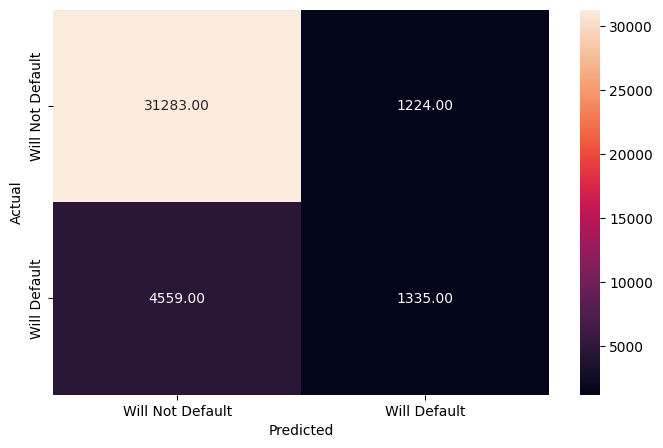

In [ ]:
y_pred = knn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
cnf_metrics(y_test, y_pred)

###Observations-

- We got an accuracy of 85%.
- The recall for class 0 is good but the recall for class 1 is too low, only 23%
- To conclude, this model failed to identify the majority of employees who will default on their loan.

- Since, The recall for class 1 is significantly low, we will now test the recall value for different number of K values.

In [ ]:
from sklearn.metrics import recall_score

k_values = [3, 5, 7, 10]  # Try different values of k
for k_value in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k_value)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f'k = {k_value}: Recall for class 1: {recall_score(y_test, y_pred, pos_label=1):.2f}')

k = 3: Recall for class 1: 0.23
k = 5: Recall for class 1: 0.19
k = 7: Recall for class 1: 0.17
k = 10: Recall for class 1: 0.13


###Observations -

- The recall value for the class 1 decreases as we increase out K value. This suggests that the KNN model works best when the K value is 2.

- We will test our data on a new model to gives a more proper comparison of the models

###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy: 0.845681102054634
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     32507
           1       0.50      0.52      0.51      5894

    accuracy                           0.85     38401
   macro avg       0.71      0.71      0.71     38401
weighted avg       0.85      0.85      0.85     38401



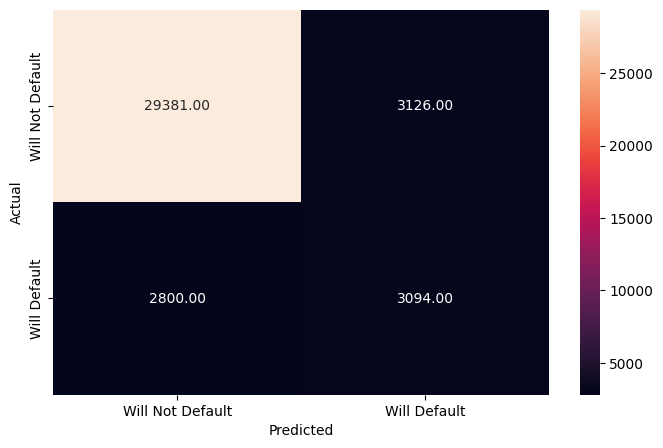

In [ ]:
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
cnf_metrics(y_test, y_pred)

###Observations -

- We have got an accuracy of 84% by using the Decision tree classifier which is almost the same as other models

- Still, we will see if we can optimize our model by tuning our hyper parameters.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

dt_model = DecisionTreeClassifier(random_state=1, class_weight={0: 1, 1: 2})

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, random_state=1)

Accuracy: 0.8499778651597615
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     32507
           1       0.51      0.52      0.52      5894

    accuracy                           0.85     38401
   macro avg       0.71      0.71      0.71     38401
weighted avg       0.85      0.85      0.85     38401



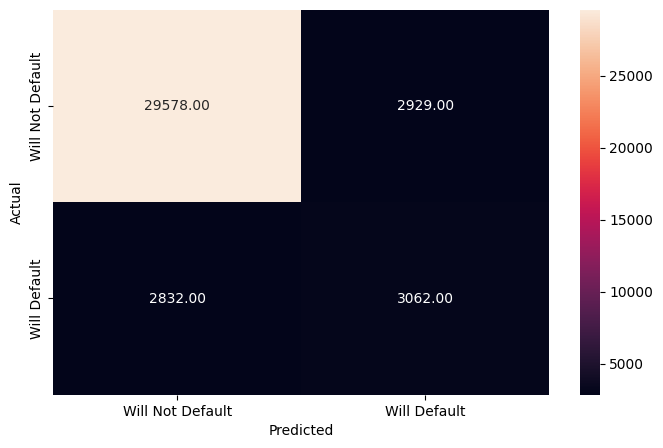

In [ ]:
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
cnf_metrics(y_test, y_pred)

###Observations -

- As we can see, even though our accuracy is increased slightly, the recall for class 1 is same as before.

- To conclude, this model will only give us 50% recall for calss 1 and won't perform well in differenctiating the customers who have a high chance of defaulting on the loan.

# Model Comparison & Selection

In [ ]:
lg_model_report = classification_report(y_test, lg_model.predict(X_test))
rf_model_report = classification_report(y_test, rf_model.predict(X_test))
knn_model_report = classification_report(y_test, knn_model.predict(X_test))
dt_model_report = classification_report(y_test, dt_model.predict(X_test))

print("Logistic Regression Report:")
print(lg_model_report)

print("\nRandom Forest Classifier Report:")
print(rf_model_report)

print("\nKNN Classifier Report:")
print(knn_model_report)

print("\nDecision Tree Classifier Report:")
print(dt_model_report)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32507
           1       0.71      0.11      0.19      5894

    accuracy                           0.86     38401
   macro avg       0.79      0.55      0.56     38401
weighted avg       0.84      0.86      0.81     38401


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     32507
           1       0.48      0.66      0.56      5894

    accuracy                           0.84     38401
   macro avg       0.71      0.77      0.73     38401
weighted avg       0.86      0.84      0.85     38401


KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     32507
           1       0.52      0.23      0.32      5894

    accuracy                           0.85     38401
   macro avg       0.70      0.59      0.6

##Observations -

- From the above table of model comparison, we can see which model is performing well and which is not.

- Now, the Random forest classifier gives us the best modified model, we will check for the feature importance using Random forest classifier

In [ ]:
#Visualizing the above report
lg_report = classification_report(y_test, lg_model.predict(X_test), output_dict=True)
rf_report = classification_report(y_test, rf_model.predict(X_test), output_dict=True)
knn_report = classification_report(y_test, knn_model.predict(X_test), output_dict=True)
dt_report = classification_report(y_test, dt_model.predict(X_test), output_dict=True)

lg_df = pd.DataFrame(lg_report).transpose()
rf_df = pd.DataFrame(rf_report).transpose()
knn_df = pd.DataFrame(knn_report).transpose()
dt_df = pd.DataFrame(dt_report).transpose()

styled_dfs = [df.style.background_gradient(cmap='viridis', axis=0).set_precision(2) for df in [lg_df, rf_df, knn_df, dt_df]]
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree']

for model_name, styled_df in zip(model_names, styled_dfs):
    print(f"\n{model_name} Report:")
    display(styled_df)



Logistic Regression Report:


,precision,recall,f1-score,support
0,0.86,0.99,0.92,32507.00
1,0.71,0.11,0.19,5894.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.79,0.55,0.56,38401.00
weighted avg,0.84,0.86,0.81,38401.00



Random Forest Report:


,precision,recall,f1-score,support
0,0.93,0.87,0.90,32507.00
1,0.48,0.66,0.56,5894.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.71,0.77,0.73,38401.00
weighted avg,0.86,0.84,0.85,38401.00



KNN Report:


,precision,recall,f1-score,support
0,0.87,0.96,0.92,32507.00
1,0.52,0.23,0.32,5894.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.70,0.59,0.62,38401.00
weighted avg,0.82,0.85,0.82,38401.00



Decision Tree Report:


,precision,recall,f1-score,support
0,0.91,0.91,0.91,32507.00
1,0.51,0.52,0.52,5894.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.71,0.71,0.71,38401.00
weighted avg,0.85,0.85,0.85,38401.00


In [ ]:
feature_importances = rf_model.feature_importances_

importances_loan_new = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importances_loan_new = importances_loan_new.sort_values(by='Importance', ascending=False)

print(importances_loan_new)


                         Feature  Importance
9                          dtir1    0.168972
1               rate_of_interest    0.108240
2                Upfront_charges    0.105604
5                         income    0.097311
8                            LTV    0.075700
23     lump_sum_payment_not_lpsm    0.073758
22     Neg_ammortization_not_neg    0.071043
4                 property_value    0.046335
0                    loan_amount    0.036478
16               loan_type_type3    0.026804
21  business_or_commercial_nob/c    0.020988
19               loan_purpose_p4    0.019472
15               loan_type_type2    0.019236
18               loan_purpose_p3    0.017273
11                  Gender_Joint    0.014908
3                           term    0.014443
10                loan_limit_ncf    0.013087
6                   Credit_Score    0.011812
20          Credit_Worthiness_l2    0.011712
7                            age    0.009980
25             occupancy_type_pr    0.008942
14        

##Conclusions:

- We were able to identify the key factors which contribute the most to Loan defaultation by the customers.

- **The Final Model - Modified Random Forest Classifier**

##Recommendations:

- We can see that the DTIR (i.e. Debt to income ratio) is the most driving factor in the Loan defaultation. A high debt-to-income ratio indicates that a significant portion of a person's income is already committed to servicing existing debts. This leaves less disposable income for unforeseen expenses or emergencies, making it more challenging for individuals to meet additional financial obligations, such as loan repayments. So to avoid this, the bank should perform a deeper analysis on DTIR.

- The customers who pay upfront charges on their loans also have a positive impact on the defaultation. Customers who choose to pay upfront charges may be doing so because they are in a financially strained situation. They might not have the means to spread the costs over the life of the loan and opt to pay everything upfront. Financial strain can be an indicator of a higher risk of default. The banks can provide customers with flexible repayment options based on their financial situation. This could include customized repayment plans, grace periods, or options to adjust installment amounts during challenging periods.

- The higher rates of interest have a positive impact on defaultation because lenders often employ risk-based pricing, where the interest rate is determined based on the perceived risk associated with the borrower. Customers with a higher risk profile, such as a lower credit score or a history of late payments, may be offered loans with higher interest rates. These individuals may be more prone to default due to their riskier financial behavior. And the bank can offer flexible repayment plans to customers facing financial difficulties. This may include options such as temporary payment reductions, deferment, or restructuring of the loan to make it more manageable.

- The customers with Lower Income face greater financial challenges, making it more difficult for them to meet their loan obligations. To avoid this, the bank can provide targeted support services for customers with lower incomes, such as financial counseling, budgeting assistance, or access to resources that can help them manage their finances more effectively.

- Customers with higher LTV ratio indicates a higher defaultation of loans because high LTV ratios may be perceived as riskier borrowers, possibly due to creditworthiness, income limitations, or other financial challenges. Higher-risk borrowers are generally more prone to default. To avoid this,banks can structure the loans with high LTV ratios carefully, taking into account the borrower's financial capacity and potential market fluctuations. Consider incorporating provisions for periodic reassessment or adjustments based on changes in the asset's value.